# Exploratory Data Analysis <a class="anchor"><a id='PVA'></a></b><br>
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

In [1]:
#pip install pandas ydata-profiling numpy matplotlib seaborn openpyxl scikit-learn
#pip install -U ydata-profiling
#pip install -U openpyxl

In [14]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math

In [4]:
data = pd.read_excel("DM2425_ABCDEats_DATASET.xlsx", sheet_name="DM2425_ABCDEats_DATASET")

In [5]:
# 1. Initial Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [6]:
data.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 2. Identify Missing Values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4           

In [11]:
# 3. Descriptive Statistical Analysis
print(data.describe())

       customer_age  vendor_count  product_count      is_chain   first_order  \
count  31161.000000  31888.000000   31888.000000  31888.000000  31782.000000   
mean      27.506499      3.102609       5.668245      2.818866     28.478604   
std        7.160898      2.771587       6.957287      3.977529     24.109086   
min       15.000000      0.000000       0.000000      0.000000      0.000000   
25%       23.000000      1.000000       2.000000      1.000000      7.000000   
50%       26.000000      2.000000       3.000000      2.000000     22.000000   
75%       31.000000      4.000000       7.000000      3.000000     45.000000   
max       80.000000     41.000000     269.000000     83.000000     90.000000   

         last_order  CUI_American     CUI_Asian  CUI_Beverages      CUI_Cafe  \
count  31888.000000  31888.000000  31888.000000   31888.000000  31888.000000   
mean      63.675521      4.880438      9.960451       2.300633      0.801163   
std       23.226123     11.654018     2

In [7]:
data.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

In [8]:
#Alterção das variáveis de object para category
data['last_promo'] = data['last_promo'].astype('category')
data['payment_method'] = data['payment_method'].astype('category')

### 2. Visualização gráfica de outliers, média, mediana, maximo e minimo

2.1. Gráficos de bigode

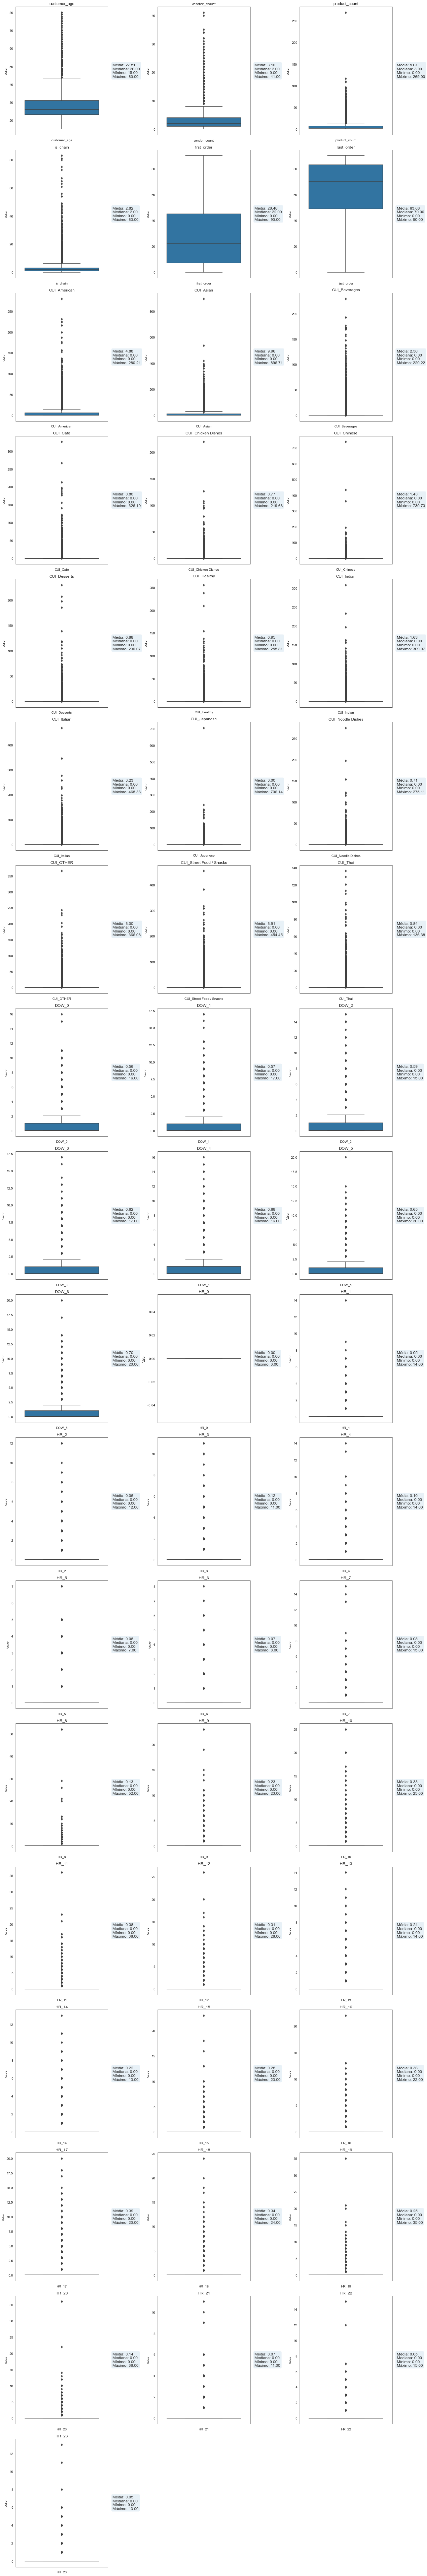

In [16]:
# Ajuste o estilo do gráfico
sns.set_style("white")

# Selecionar apenas as colunas numéricas (int64 e float64)
numeric_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if data[col].notna().any()]

# Definir o número de colunas que você quer por linha
n_cols = 3

# Calcular o número de linhas necessárias
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Configurar o tamanho da figura dinamicamente com base no número de linhas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten()

# Loop sobre as colunas numéricas e criar gráficos de bigode
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=data, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Valor")

    # Calcular estatísticas
    mean_value = data[col].mean()
    median_value = data[col].median()
    min_value = data[col].min()
    max_value = data[col].max()

    # Adicionar estatísticas ao lado do boxplot
    stats_text = (f'Média: {mean_value:.2f}\n'
                  f'Mediana: {median_value:.2f}\n'
                  f'Mínimo: {min_value:.2f}\n'
                  f'Máximo: {max_value:.2f}')
    
    axes[i].text(1.05, 0.5, stats_text, transform=axes[i].transAxes, 
                  fontsize=12, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

# Remover eixos vazios, caso o número de variáveis seja menor que o grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para não sobrepor os títulos e eixos
plt.tight_layout()
plt.show()

2.2. Histogramas a nível relativo

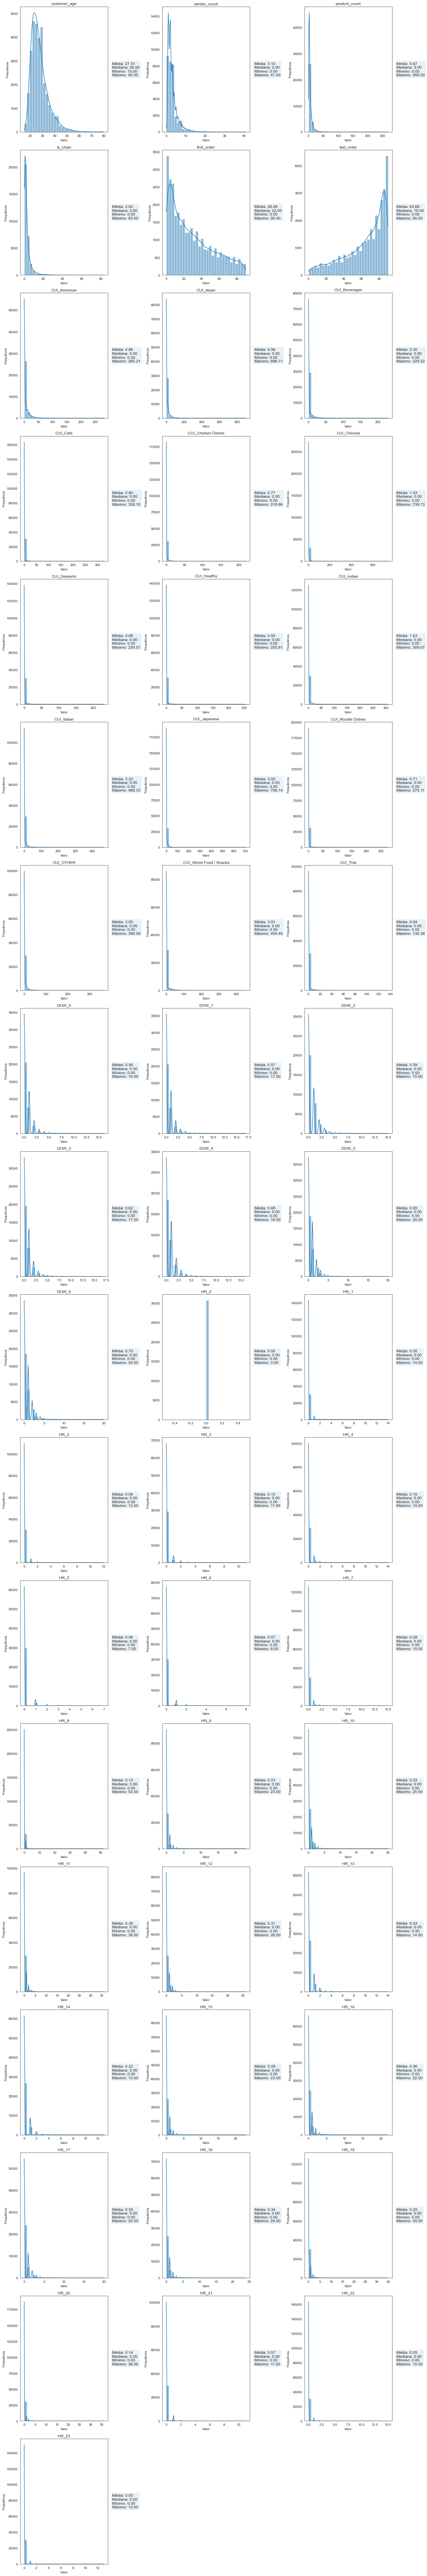

In [17]:
# Ajuste o estilo do gráfico
sns.set_style("white")

# Selecionar apenas as colunas numéricas (int64 e float64)
numeric_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if data[col].notna().any()]

# Definir o número de colunas que você quer por linha
n_cols = 3

# Calcular o número de linhas necessárias
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Configurar o tamanho da figura dinamicamente com base no número de linhas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten()

# Loop sobre as colunas numéricas e criar histogramas
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True)  # Adicionando o KDE para visualização
    axes[i].set_title(col)
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frequência")

    # Calcular estatísticas
    mean_value = data[col].mean()
    median_value = data[col].median()
    min_value = data[col].min()
    max_value = data[col].max()

    # Adicionar estatísticas ao lado do histograma
    stats_text = (f'Média: {mean_value:.2f}\n'
                  f'Mediana: {median_value:.2f}\n'
                  f'Mínimo: {min_value:.2f}\n'
                  f'Máximo: {max_value:.2f}')
    
    axes[i].text(1.05, 0.5, stats_text, transform=axes[i].transAxes, 
                  fontsize=12, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

# Remover eixos vazios, caso o número de variáveis seja menor que o grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para não sobrepor os títulos e eixos
plt.tight_layout()
plt.show()

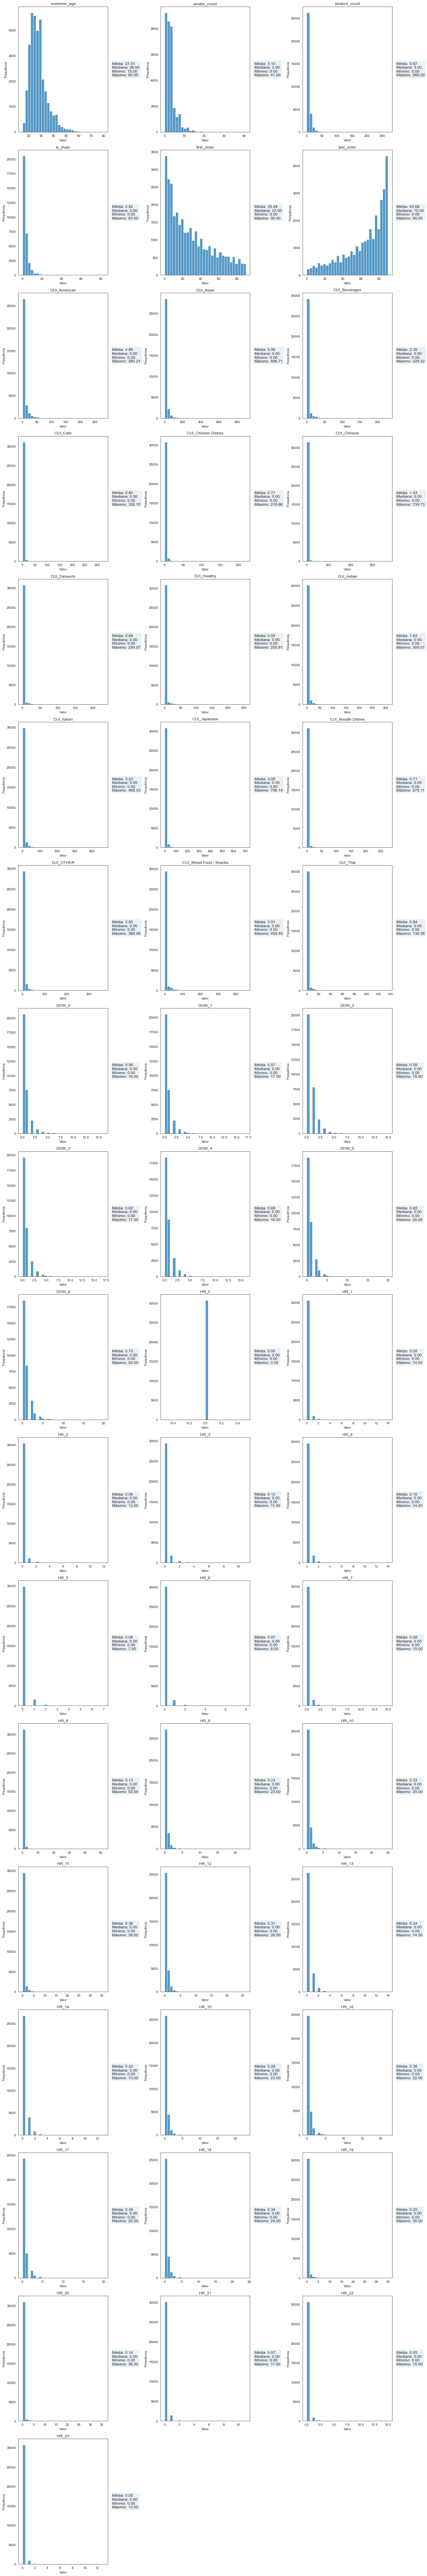

In [18]:
# Ajuste o estilo do gráfico
sns.set_style("white")

# Selecionar apenas as colunas numéricas (int64 e float64)
numeric_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if data[col].notna().any()]

# Definir o número de colunas que você quer por linha
n_cols = 3

# Calcular o número de linhas necessárias
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Configurar o tamanho da figura dinamicamente com base no número de linhas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten()

# Loop sobre as colunas numéricas e criar histogramas
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], bins=30, ax=axes[i], stat='count')  # Usando 'stat=count' para contagens absolutas
    axes[i].set_title(col)
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frequência")

    # Calcular estatísticas
    mean_value = data[col].mean()
    median_value = data[col].median()
    min_value = data[col].min()
    max_value = data[col].max()

    # Adicionar estatísticas ao lado do histograma
    stats_text = (f'Média: {mean_value:.2f}\n'
                  f'Mediana: {median_value:.2f}\n'
                  f'Mínimo: {min_value:.2f}\n'
                  f'Máximo: {max_value:.2f}')
    
    axes[i].text(1.05, 0.5, stats_text, transform=axes[i].transAxes, 
                  fontsize=12, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

# Remover eixos vazios, caso o número de variáveis seja menor que o grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para não sobrepor os títulos e eixos
plt.tight_layout()
plt.show()

In [19]:
unique_product_counts = data['product_count'].unique()
print(unique_product_counts)

[  5   2   3   4   6  10   8  17   7  26   9  32  15  13  16  28  19  12
  18  11  25  14  23  29  21  31  95  24  64  27  37  49  22  41  51  34
  39  20  30  47  40  53  38  54  35  33  56  65  45  63  36  79  48  70
  44  84  46  66  57  58  83 110 117 269  75  55  42  81  91  43  69  67
  72  59   1   0  77  97  87  73  76  60 109  52  62  94  80  89  61  82
  50  88  68]


In [20]:
unique_product_counts = data['is_chain'].unique()
print(unique_product_counts)

[ 1  2  0  3  5  4  7 12  6 23  8 11 20 14  9 10 16 15 13 25 17 27 30 32
 24 18 26 28 22 40 31 39 21 37 19 33 65 38 29 45 47 73 81 56 35 46 67 44
 61 34 36 49 83 75 43 42 48 63 54 80]


In [22]:
filtered_row = data[data['product_count'] == 269]
filtered_row

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
1270,92ced2dcb9,2360,23.0,40,269,81,0.0,88,-,CARD,...,4,3,8,14,7,15,9,2,2,2
